<a href="https://colab.research.google.com/github/Pudi-Bheemesh/Dog-classifier/blob/main/Dog_classificationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi Dog Breed Classification

This notebook build an end-to-end multi-class image classification using Tensorflow 2.0 and Teensorflow Hub.

## 1. Problem

Identifying a breed of dog given a image of a dog.

When I am sitting a cafe and I take a photo of a dog I want to know what breed it is.

## 2. Data

The data we use from Kaggle's Dog Breed Identification Classification

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with a prediction probabilities for each dog breed of each test page.

## 4. Features
Some information about Data


In [ ]:
#!unzip "drive/MyDrive/doggies/dog-breed-identification.zip" -d "drive/MyDrive/doggies/"

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ",tf.__version__)
print("TF Hub Version: ",hub.__version__)

#Check for GPU Availability
print("GPU","Available (YESSS!!!!!)" if tf.config.list_physical_devices("GPU") else "Not Available :(")

TF Version:  2.12.0
TF Hub Version:  0.13.0
GPU Available (YESSS!!!!!)


## Getting our data ready (Turning into Tensors)

with all the machine learning models, our data has to be in the numerical format. So we should first convert our images into tensors (Numerical Representation).

In [ ]:
# Check-out the labels of the data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/doggies/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

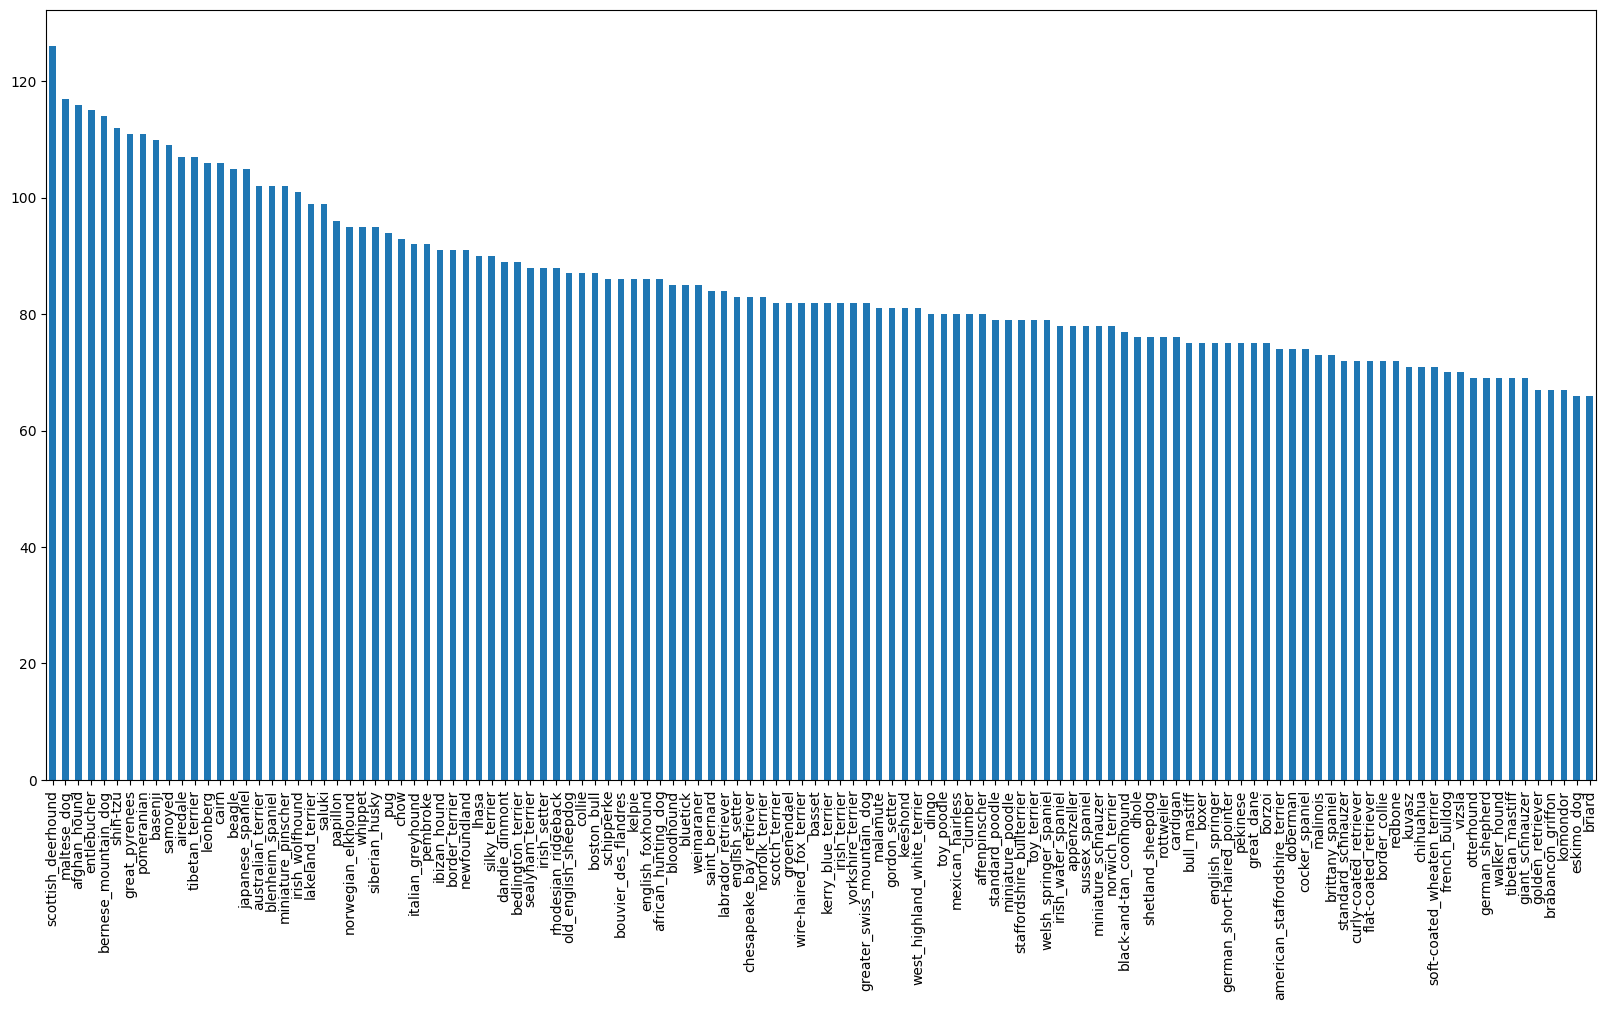

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

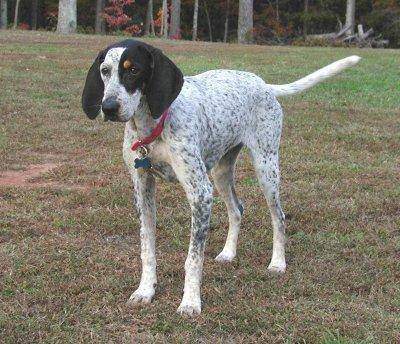

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/doggies/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

### Getting images and their filenames

let's get a list of image file pathnames

In [ ]:
#Create pathnames from image IDs
filenames = ["drive/MyDrive/doggies/train/" + fname for fname in labels_csv["id"] + ".jpg"]
filenames[:10]

['drive/MyDrive/doggies/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/doggies/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/doggies/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/doggies/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/doggies/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/doggies/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/doggies/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/doggies/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/doggies/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/doggies/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check weather number of filenames matches actual image files
import os
if len(os.listdir("drive/MyDrive/doggies/train/")) == len(filenames):
  print("Filenames match actual amount of files ")
else:
  print("does not match")

Filenames match actual amount of files 


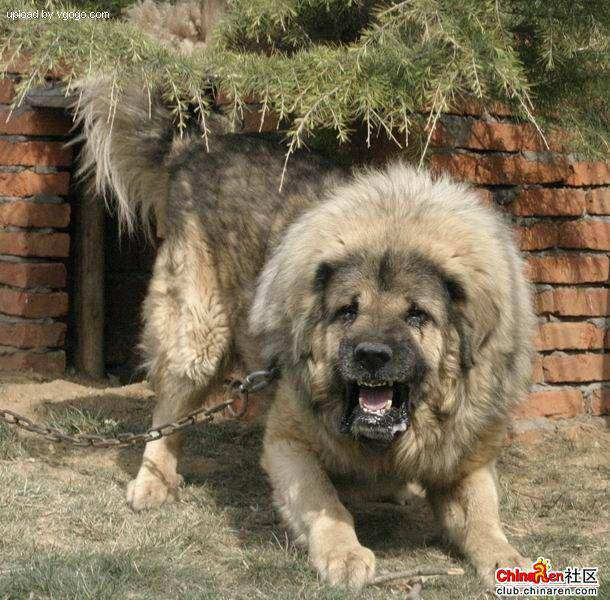

In [ ]:
# One more check
Image(filenames[9000])

since we now training image filepaths as a lis, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not matches number of filenames")

Number of labels matches number of filenames


In [ ]:
unique_breeds = np.unique(labels)
print(unique_breeds)
len(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

120

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
#Turning boolean arrays into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean arrays
print(boolean_labels[0].astype(int)) #there will be 1 where the samplelabel occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/doggies/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/doggies/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/doggies/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/doggies/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/doggies/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/doggies/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/doggies/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/doggies/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/doggies/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/doggies/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

###Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
#set number of images usd for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min: 1000, max:10000, step: 1000}

In [ ]:
# Lets train our data by train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation total size of NUM_IMAGES

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size = 0.2,
                                               random_state = 42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [ ]:
#lets have a gaze at the training data
X_train[:2], y_train[:2]

(['drive/MyDrive/doggies/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/doggies/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, Fa

## Preprocessing Images(Converting images into tensors)

To preprocess our images as tensors we need to write a function that does a few things:

1. Take the image filepath as the input.
2. Use tensorflow to read the file and save it to the variable, `image`.
3. Turn our `image` as tensors.
4. Normalize our image (convert the color channels from 0-225 to 0-1)
5. Resize the `image` to in the shape of (224,224).
6. Return the modified `image`.

Before we start lets import an image using NumPy

In [ ]:
#convert image into NumPy Array
from matplotlib.pyplot import imread

IMG_SIZE = 224 # Defining image size
def process_image(image_path, img_size = IMG_SIZE):
  """Takes a image filepath and turns the image into a  Tensor"""

  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg with the numerical tensor with 3 color channels(Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # convert the color channel Values from 0-225 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to (224,224)
  image = tf.image.resize(image,size=[img_size,img_size])
  return image

## Turning our data into Batches

We are going to do a 32(Batch size) images at a time (You can manually adjust the Batch size)
In order to use tensorflow effectively we need our data in form of tensor tuples which looks like this

In [ ]:
#Create a simple function to return a tuple (image,label)
def get_image_label(image_path,label):
  return process_image(image_path),label
  """
  Takes the image file pathname and the associated label,
  process the image and return a tuple of (image,label)
  """


In [ ]:
# Demo of the above function
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

Creating training data batches...
Creating validation data batches...


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

##Visualing data batches

Our data is now in, however it is little hard to understand/Comprehend let's visualise them

In [ ]:
import matplotlib.pyplot as plt

#Creating a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

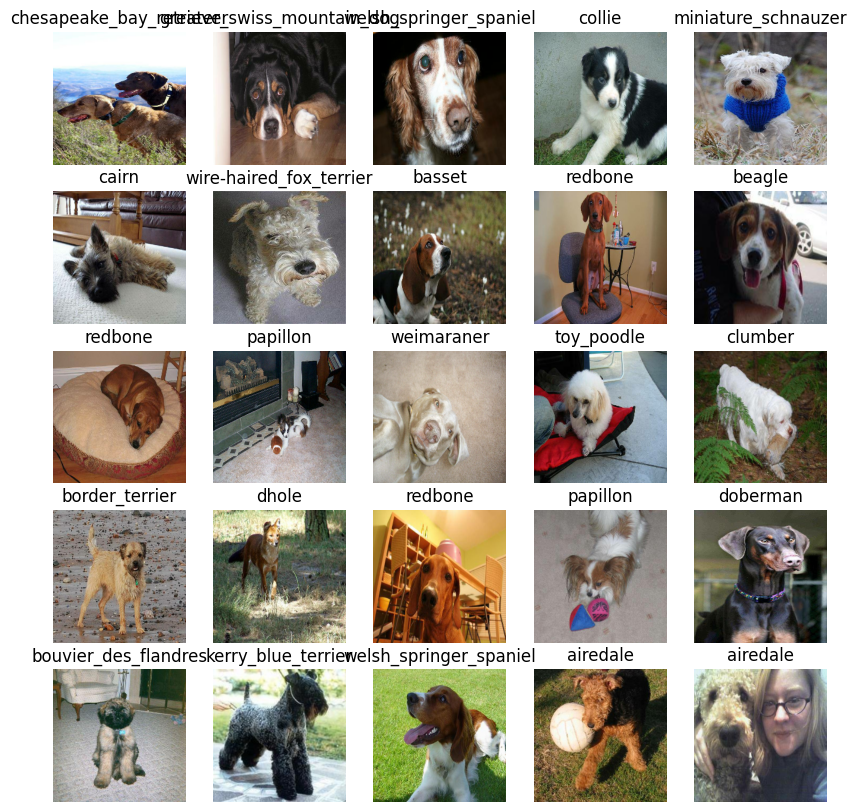

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Building a model

To build a model we will e using transfer learning.There are a few things we need to define

* The input shape (The images shape in form of Tensors) to our model
* The output shape (Image labels in form of tensors) of our model
* URL of the model we need to use